In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for progress bars

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load and preprocess the data
print("Loading data...")
data = np.load('pendulum_data30000.npz')  # Replace with your NPZ file path

# Assuming the NPZ file contains arrays named 'Theta1', 'Theta2', 'X1', 'Y1', 'X2', 'Y2', 'Energy'
keys = ['Theta1', 'Theta2', 'X1', 'Y1', 'X2', 'Y2', 'Energy']
df = np.column_stack([data[key] for key in keys])  # Stack arrays column-wise

# Show a preview of the data before scaling
print("Data before scaling (first 5 rows):")
print(df[:5])  # Print the first 5 rows

print("\nScaling the features...")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the features
scaled_df = scaler.fit_transform(df)

# Show a preview of the data after scaling
print("Data after scaling (first 5 rows):")
print(scaled_df[:5])  # Print the first 5 rows of scaled data

# Convert to PyTorch tensor and move to GPU
print("\nConverting data to PyTorch tensor and moving to GPU...")
data_tensor = torch.tensor(scaled_df, dtype=torch.float32).to(device)

# Show the shape and some information about the tensor
print(f"\nShape of the tensor: {data_tensor.shape}")
print(f"First 5 rows of the tensor (on CPU):")
print(data_tensor.cpu().numpy()[:5])  # Print the first 5 rows of the tensor


print("\nData processing complete!")


Using device: cuda
Loading data...
Data before scaling (first 5 rows):
[[ 1.34639685  2.35619449  0.97492791 -0.22252093  1.68203469  0.48458585
   2.5708568 ]
 [ 1.34639236  2.35619341  0.97492691 -0.22252532  1.68203445  0.4845807
   2.5708568 ]
 [ 1.34637887  2.35619018  0.97492391 -0.22253847  1.68203374  0.48456527
   2.5708568 ]
 [ 1.34635639  2.3561848   0.97491891 -0.22256038  1.68203254  0.48453955
   2.5708568 ]
 [ 1.34632492  2.35617726  0.9749119  -0.22259106  1.68203087  0.48450354
   2.5708568 ]]

Scaling the features...
Data after scaling (first 5 rows):
[[1.27186617 1.98612073 1.34159857 0.73864239 1.66218584 1.79515048
  1.76452852]
 [1.27186193 1.98612072 1.3415972  0.73863212 1.66218561 1.7951427
  1.76452852]
 [1.27184919 1.98612071 1.34159307 0.73860133 1.6621849  1.79511937
  1.76452852]
 [1.27182795 1.9861207  1.34158619 0.73855    1.66218372 1.79508048
  1.76452852]
 [1.27179823 1.98612067 1.34157655 0.73847814 1.66218206 1.79502603
  1.76452852]]

Converting da

Processing Data: 100%|██████████| 100/100 [00:00<00:00, 1302578.88it/s]


Data processing complete!


Running K-Means clustering with k=3...


K-Means iterations:  56%|█████▌    | 56/100 [00:02<00:02, 21.08it/s]


K-Means converged in 57 iterations.


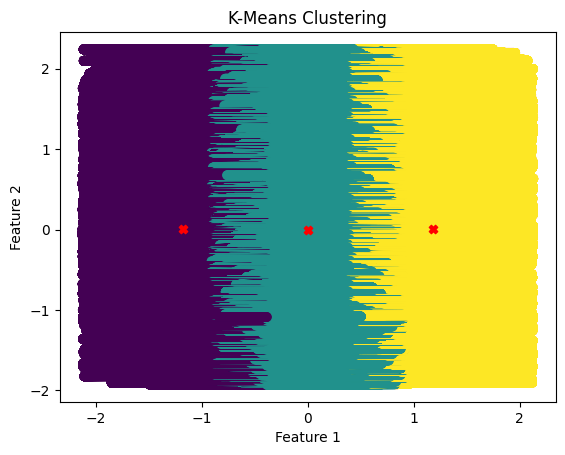

In [4]:
# ===========================
# K-Means Clustering Implementation
# ===========================

def kmeans(X, k, max_iters=100):
    print(f"Running K-Means clustering with k={k}...")
    # Randomly initialize k centroids
    centroids = X[torch.randint(0, X.size(0), (k,))]

    for i in tqdm(range(max_iters), desc="K-Means iterations"):
        # Compute distance between data points and centroids
        distances = torch.cdist(X, centroids)

        # Assign points to the nearest centroid
        labels = torch.argmin(distances, dim=1)

        # Recompute centroids by averaging the points assigned to them
        new_centroids = torch.stack([X[labels == i].mean(dim=0) for i in range(k)])

        # If centroids do not change, break early
        if torch.all(centroids == new_centroids):
            print(f"K-Means converged in {i+1} iterations.")
            break
        centroids = new_centroids

    return centroids, labels

# Run K-Means on your data
k = 3  # Number of clusters
centroids, labels = kmeans(data_tensor, k)

# Plot K-Means results
plt.scatter(data_tensor[:, 0].cpu().numpy(), data_tensor[:, 1].cpu().numpy(), c=labels.cpu().numpy())
plt.scatter(centroids[:, 0].cpu().numpy(), centroids[:, 1].cpu().numpy(), marker='X', color='red')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Using device: cuda
Loading data...
Clustering with features: ('Theta1',)
Clustering with features: ('Theta2',)
Clustering with features: ('X1',)
Clustering with features: ('Y1',)
Clustering with features: ('X2',)
Clustering with features: ('Y2',)
Clustering with features: ('Energy',)
Clustering with features: ('Theta1', 'Theta2')


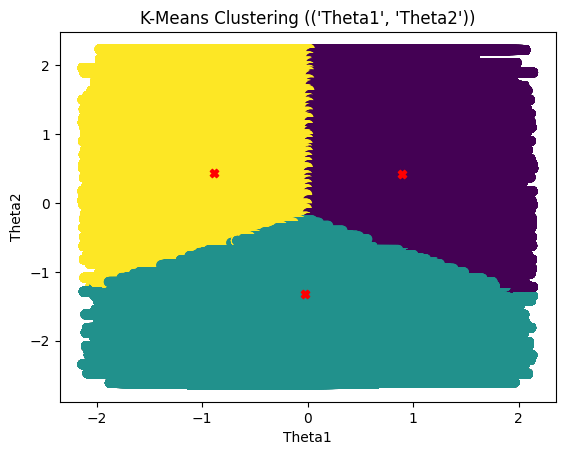

Clustering with features: ('Theta1', 'X1')


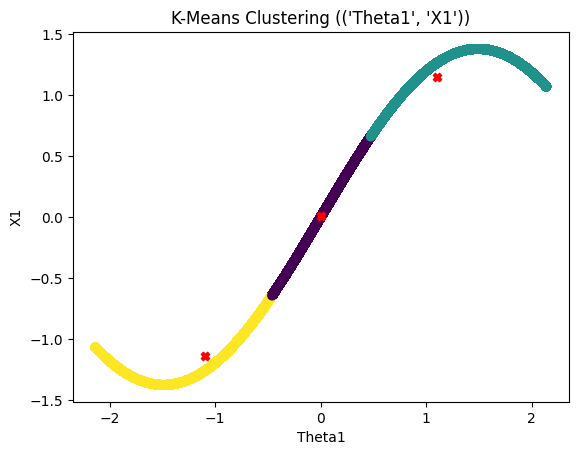

Clustering with features: ('Theta1', 'Y1')


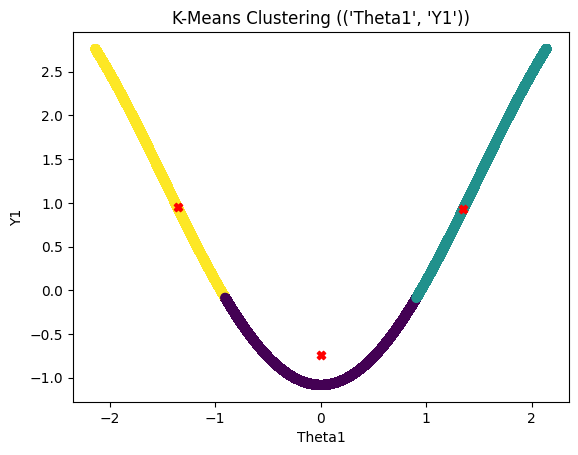

Clustering with features: ('Theta1', 'X2')


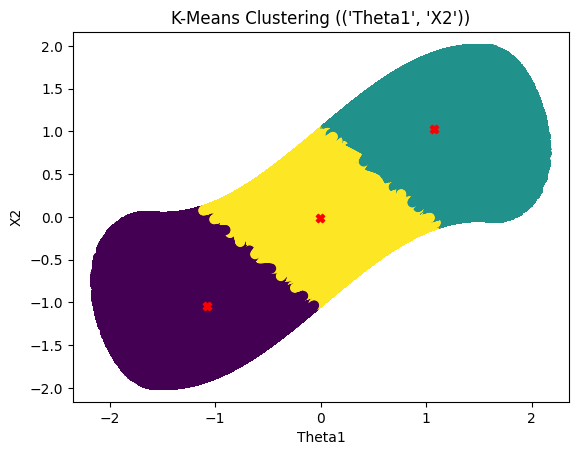

Clustering with features: ('Theta1', 'Y2')


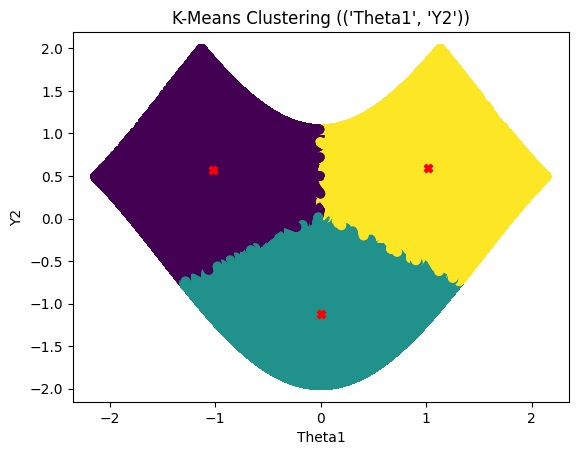

Clustering with features: ('Theta1', 'Energy')


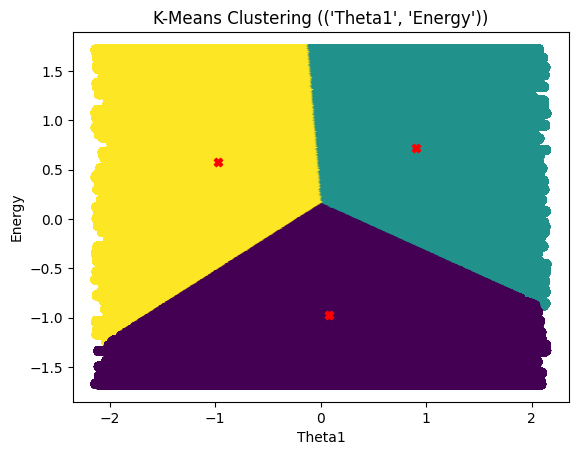

Clustering with features: ('Theta2', 'X1')


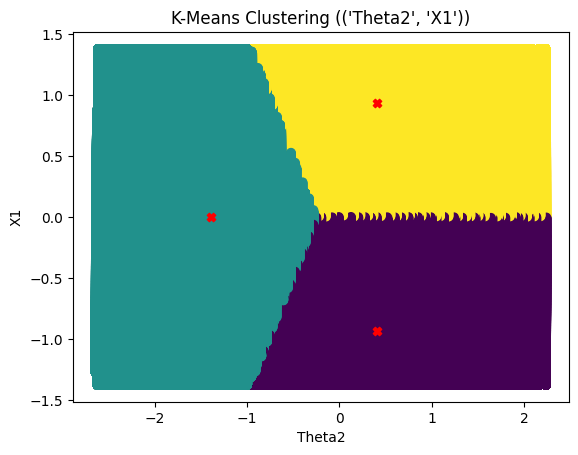

Clustering with features: ('Theta2', 'Y1')


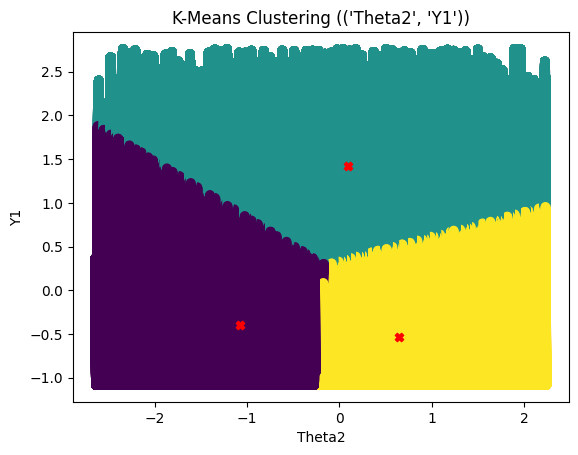

Clustering with features: ('Theta2', 'X2')


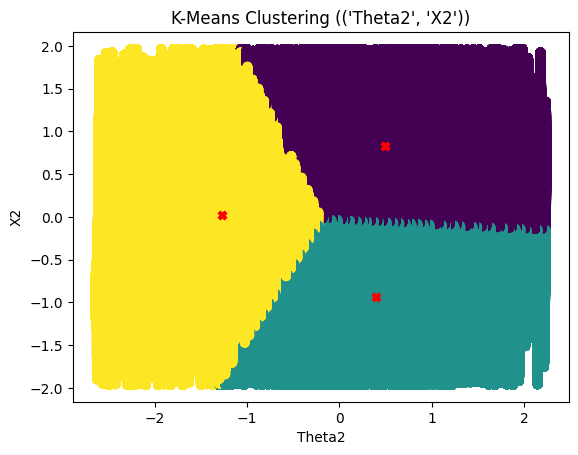

Clustering with features: ('Theta2', 'Y2')


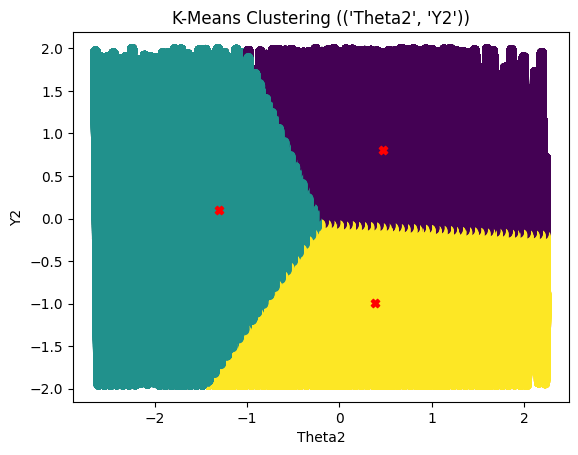

Clustering with features: ('Theta2', 'Energy')


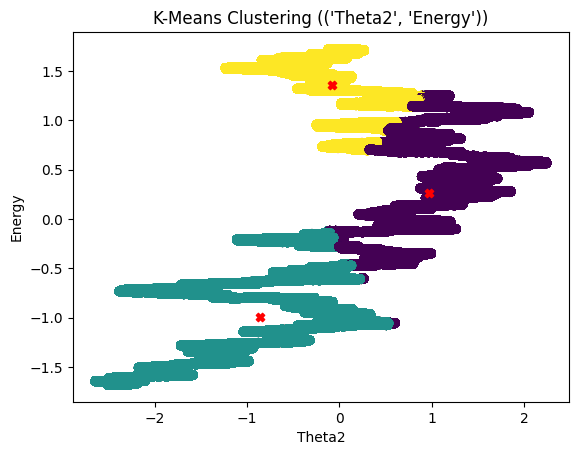

Clustering with features: ('X1', 'Y1')


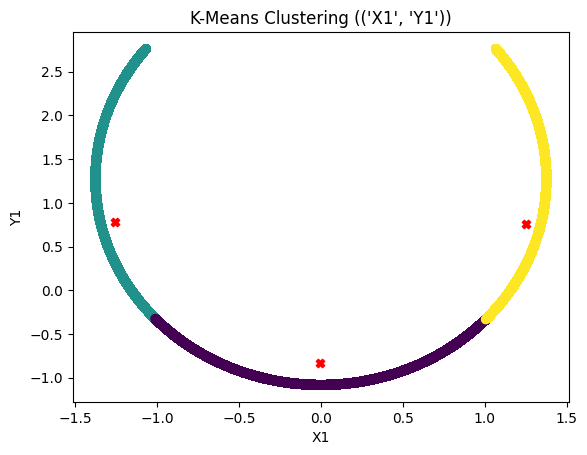

Clustering with features: ('X1', 'X2')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import itertools
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load and preprocess the data
print("Loading data...")
df = pd.read_csv('pendulum_data.csv')  # Replace with your CSV file path

# Available features for selection
feature_columns = ['Theta1', 'Theta2', 'X1', 'Y1', 'X2', 'Y2', 'Energy']

# Function for K-Means clustering
def kmeans(X, k, max_iters=100):
    centroids = X[torch.randint(0, X.size(0), (k,))]
    for _ in range(max_iters):
        distances = torch.cdist(X, centroids)
        labels = torch.argmin(distances, dim=1)
        new_centroids = torch.stack([X[labels == i].mean(dim=0) for i in range(k)])
        if torch.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Iterate over all feature combinations
k = 3  # Number of clusters
best_combination = None
best_variance = float('-inf')

for r in range(1, len(feature_columns) + 1):
    for subset in itertools.combinations(feature_columns, r):
        print(f"Clustering with features: {subset}")

        # Scale selected features
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df[list(subset)])
        data_tensor = torch.tensor(scaled_data, dtype=torch.float32).to(device)

        # Perform K-Means clustering
        centroids, labels = kmeans(data_tensor, k)

        # Compute variance of cluster assignments for evaluation
        variance = torch.var(labels.float()).item()
        
        # Track the best feature set (max variance for distinct clustering)
        if variance > best_variance:
            best_variance = variance
            best_combination = subset

        # Plot only if 2D data for visualization
        if len(subset) == 2:
            plt.scatter(data_tensor[:, 0].cpu().numpy(), data_tensor[:, 1].cpu().numpy(), c=labels.cpu().numpy())
            plt.scatter(centroids[:, 0].cpu().numpy(), centroids[:, 1].cpu().numpy(), marker='X', color='red')
            plt.title(f"K-Means Clustering ({subset})")
            plt.xlabel(subset[0])
            plt.ylabel(subset[1])
            plt.show()

print(f"Best feature combination: {best_combination} with variance {best_variance}")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# Check for available GPUs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_gpus = torch.cuda.device_count()

# Load and preprocess the data
df = pd.read_csv('pendulum_data.csv')  # Replace with your CSV file path
feature_columns = ['Theta1', 'Theta2', 'X1', 'Y1', 'X2', 'Y2', 'Energy']

# Autoencoder Definition
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Hyperparameters
encoding_dim = 2
num_epochs = 20
best_combination = None
best_variance = float('-inf')

# Iterate through all feature combinations
for r in range(1, len(feature_columns) + 1):
    for subset in itertools.combinations(feature_columns, r):
        print(f"Training Autoencoder with features: {subset}")

        # Scale selected features
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df[list(subset)])
        data_tensor = torch.tensor(scaled_data, dtype=torch.float32).to(device)

        # Instantiate and train the autoencoder
        model = Autoencoder(len(subset), encoding_dim).to(device)

        # Use DataParallel if more than 1 GPU is available
        if num_gpus > 1:
            model = nn.DataParallel(model)

        optimizer = optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()

        for epoch in tqdm(range(num_epochs), desc=f"Epochs ({subset})", ncols=100):
            model.train()
            optimizer.zero_grad()
            output = model(data_tensor)
            loss = criterion(output, data_tensor)
            loss.backward()
            optimizer.step()

        # Extract encoded features
        model.eval()
        with torch.no_grad():
            encoded_data = model.module.encoder(data_tensor).cpu().numpy() if num_gpus > 1 else model.encoder(data_tensor).cpu().numpy()

        # Compute variance of encoded data for evaluation
        variance = torch.var(torch.tensor(encoded_data)).item()

        # Track the best feature set
        if variance > best_variance:
            best_variance = variance
            best_combination = subset

        # Plot only if encoding_dim == 2
        if encoding_dim == 2:
            plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
            plt.title(f'Autoencoder Encoded Data ({subset})')
            plt.xlabel('Encoded Dimension 1')
            plt.ylabel('Encoded Dimension 2')
            plt.show()

print(f"Best feature combination: {best_combination} with variance {best_variance}")
